## Import

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [32]:
df = pd.read_csv('gasNetworkData.csv', sep=';')
for i in range(df.shape[0]):
    df.iloc[i] = df.iloc[i].str.replace(',', '.')
df = df.astype('float')

In [23]:
df.head()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7
0,0.860935,0.44369,0.306735,1.0,0.728952,1.0,0.66301,1.0,0.226941,0.327049,0.773153,1.0,17.911733,9.257217,1.122351,2.148112,5.624864,8.07628,303535.895746,261828.526728,213391.443357,202884.784496,207656.304053,216941.015192,217006.317139,216075.267042,257146.643682,202885.460552,255259.392425,1.164164,0.637044,0.644746,0.658984,0.685891,2.608879,1.06969
1,0.557628,0.615053,0.6134,0.103841,0.687017,0.348602,0.763177,0.476247,0.921243,0.310913,0.965571,0.989103,12.486533,12.758708,2.304664,1.554495,5.691468,6.55712,259089.603894,265774.736884,200047.438509,183655.815191,184590.350114,195559.655955,195389.057982,193498.599342,223286.262628,196699.095176,238643.246117,1.076435,0.562278,0.56955,0.585703,0.574112,2.51239,1.022334
2,0.926284,0.940594,0.858183,1.0,0.53225,0.8924,0.434812,0.902982,0.841641,0.67752,0.22216,0.898325,17.970392,17.024003,5.578023,5.401818,2.074575,9.856532,335750.327166,336835.812259,233045.722524,223744.966298,227355.327211,241573.710094,243820.700493,242836.043149,298800.614359,262389.026328,293994.294138,1.294528,0.701013,0.703572,0.788734,0.768667,3.182209,1.491356
3,0.684077,0.410386,0.557988,0.36585,0.557272,0.673942,0.930405,0.517681,0.345683,0.988507,0.747793,0.917262,15.005748,8.79696,0.33784,4.375871,4.145848,5.854003,272960.153141,241815.279447,186600.43616,182034.79102,185596.997436,196370.620097,197715.569744,196039.195016,233255.89743,199985.852735,236028.48824,0.984929,0.505336,0.546835,0.62004,0.576221,2.509437,1.078984
4,0.770426,0.61002,0.361751,0.466569,0.812129,0.628494,1.0,0.214384,0.428915,1.0,0.751079,0.631921,15.912712,12.345604,1.500297,5.558692,5.017675,5.78929,307262.65756,281568.675598,225327.277278,203905.378696,202721.780293,216643.96972,217749.903975,216061.381945,256806.969882,208319.243658,269020.144561,1.264854,0.643253,0.636142,0.683626,0.700243,2.903733,1.135832


In [312]:
def plant_q_rule(series, threshold=1e-1):
    return (series >= threshold).astype(int)

def private_q_rule(series, threshold=0.6):
    name = series.name
    if name in ['Q_1', 'Q_7']:
        threshold *= 2
    if name in ['Q_6']:
        threshold *= 4
    return (series >= threshold).astype(int)

## HeatMap

<AxesSubplot:>

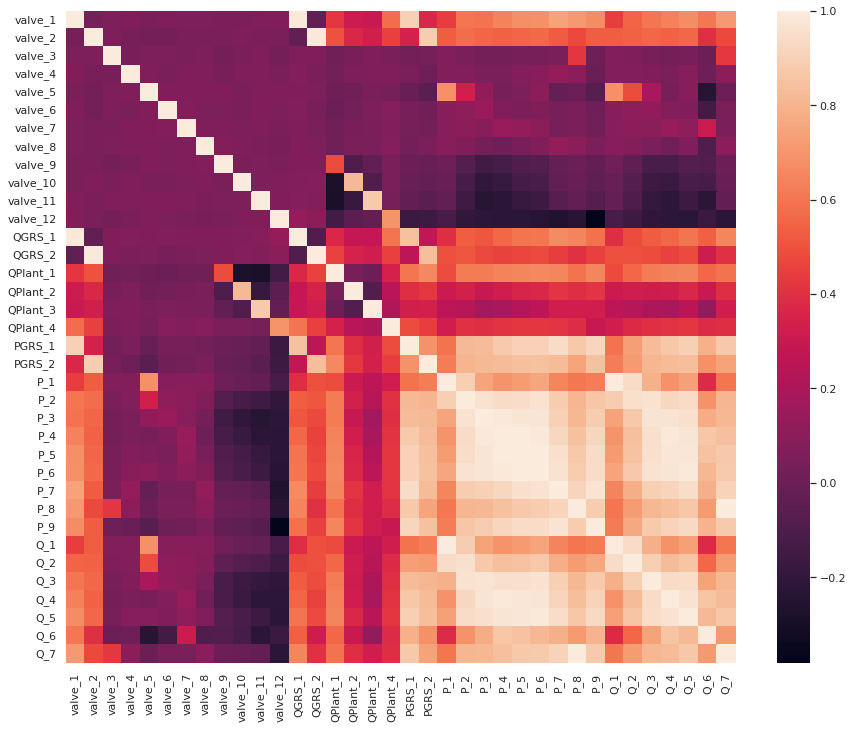

In [45]:
sns.heatmap(df.corr())

## Data Validity

<AxesSubplot:>

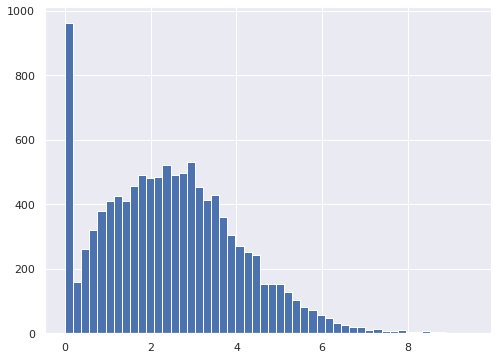

In [144]:
sns.set(rc={'figure.figsize':(8,6)})
df.QPlant_1.hist(bins=50)

<AxesSubplot:>

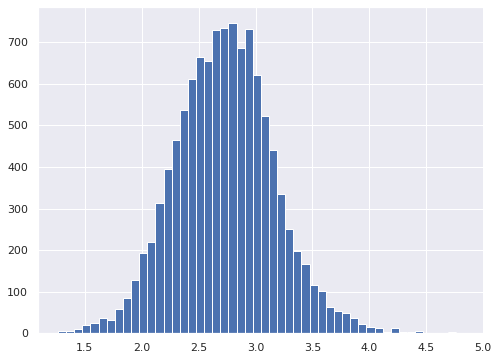

In [310]:
df.Q_6.hist(bins=50)

In [115]:
for i in range(1, 5):
    df[f'validPlant_{i}'] = plant_q_rule(df[f'QPlant_{i}'])

for i in range(1, 8):
    df[f'validPrivate_{i}'] = private_q_rule(df[f'Q_{i}'])


df['validPrivate'] = df[[f'validPrivate_{i}' for i in range(1, 8)]].product(axis=1)
df['validPlant'] = df[[f'validPlant_{i}' for i in range(1, 5)]].product(axis=1)
df['valid'] = df['validPlant'] * df['validPrivate']

In [121]:
df['validPrivate'] = df[[f'validPrivate_{i}' for i in range(1, 8)]].product(axis=1)
df['validPlant'] = df[[f'validPlant_{i}' for i in range(1, 5)]].product(axis=1)
df['valid'] = df['validPlant'] * df['validPrivate']

In [202]:
df[df['valid'] > 0].shape

(3546, 53)

## Save data

In [133]:
df.to_csv('gas_preprocessed.csv', sep=';')

## Compare valid vs invalid

In [140]:
df.groupby('validPlant_4').mean()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,validPlant_1,validPlant_2,validPlant_3,validPrivate_1,validPrivate_2,validPrivate_3,validPrivate_4,validPrivate_5,validPrivate_6,validPrivate_7,validPrivate,validPlant,valid
validPlant_4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.185479,0.217823,0.605514,0.606940,0.666758,0.596113,0.623047,0.576775,0.549409,0.624299,0.640351,0.602710,4.456235,4.883987,0.003024,1.820012,2.655889,0.002724,196995.623406,197481.586771,161352.924838,158099.925577,163666.834034,170334.987233,168425.817835,166561.928346,187496.524151,161879.845524,195453.263915,0.794283,0.426987,0.451566,0.494095,0.477459,2.000321,0.795641,0.010309,0.989691,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.00000
1,0.657561,0.658116,0.652315,0.632832,0.632973,0.636341,0.632329,0.635795,0.637771,0.637804,0.633047,0.636334,13.547276,12.757072,2.513320,3.828350,4.427778,5.244303,291969.972217,289719.159875,210967.033587,199744.554856,202765.295697,214835.850427,216110.219737,214981.761717,259609.089262,221702.075139,266195.936078,1.151382,0.601150,0.619521,0.673550,0.670795,2.741358,1.215260,0.934528,1.000000,1.0,0.428219,0.516185,0.591624,0.803219,0.782644,1.0,0.532644,0.32425,0.934528,0.32425


<AxesSubplot:>

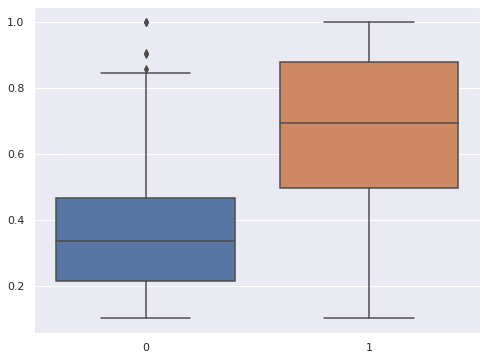

In [205]:
arr1 = df.query('validPlant_1 == 0')['valve_1'].values
arr2 = df.query('validPlant_1 == 1')['valve_1'].values
# arr1 = df['QGRS_1'].values
# arr2 = df['QGRS_2'].values
sns.boxplot(data=[arr1, arr2])

## Compare and decompose Q 

In [174]:
df['QPrivate'] = df[[f'Q_{i}' for i in range(1, 8)]].sum(axis=1) 
df['QPlant'] = df[[f'QPlant_{i}' for i in range(1, 5)]].sum(axis=1)
df['QGRS'] =  df['QGRS_1'] + df['QGRS_2']

<AxesSubplot:>

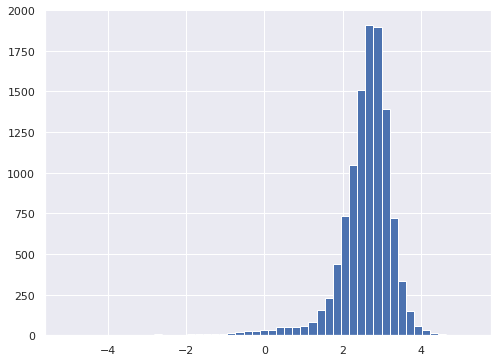

In [177]:
(df['QGRS'] - df['QPrivate'] - df['QPlant']).hist(bins=50)

<AxesSubplot:>

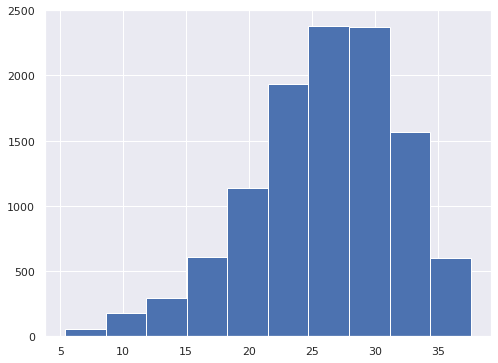

In [178]:
df['QGRS'].hist()

0.09868082261831929
0.09988012113079227


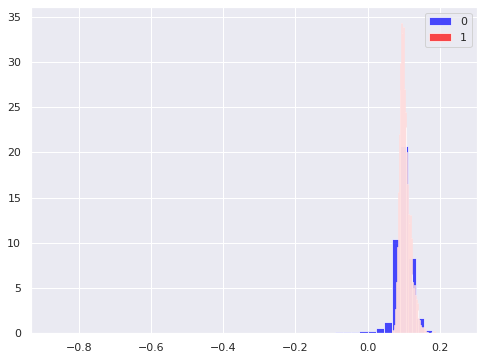

In [201]:
grp = df.groupby('valid')
for idx, group in grp:
#     (group['QGRS'] - group['QPrivate'] - group['QPlant']).hist(bins=50, density=True, alpha=0.6, label=idx)
    ((group['QGRS'] - group['QPrivate'] - group['QPlant']) / group['QGRS']).hist(bins=50, density=True, alpha=0.7, label=idx, color=['blue', 'red'][idx])
    print(((group['QGRS'] - group['QPrivate'] - group['QPlant']) / group['QGRS']).median())
plt.legend()


## Pressure data

<AxesSubplot:>

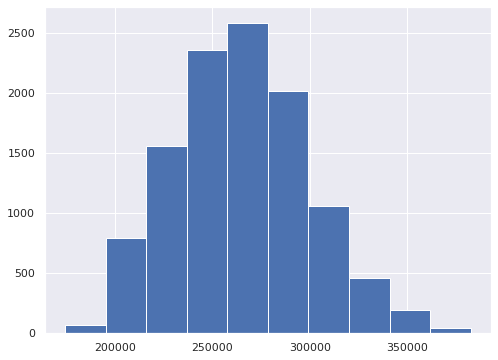

In [209]:
df['P_9'].hist()

In [220]:
df.query("P_9 <= 200000")['validPlant_4'].mean()

0.0

<AxesSubplot:xlabel='P_9', ylabel='QPlant_4'>

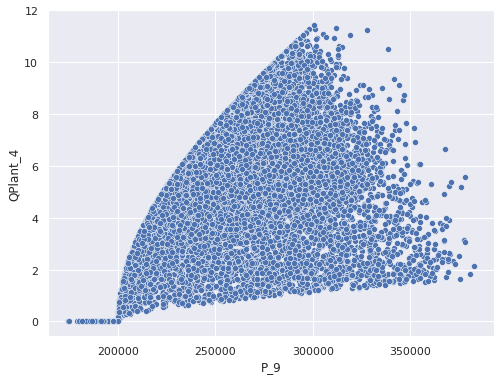

In [223]:
sns.scatterplot(x=df['P_9'], y=df['QPlant_4'])

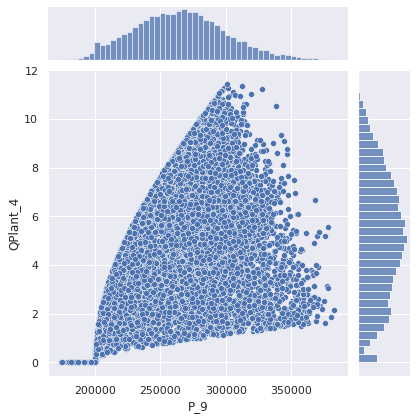

In [224]:
sns.jointplot(x=df['P_9'], y=df['QPlant_4'])

<AxesSubplot:xlabel='P_8', ylabel='Q_7'>

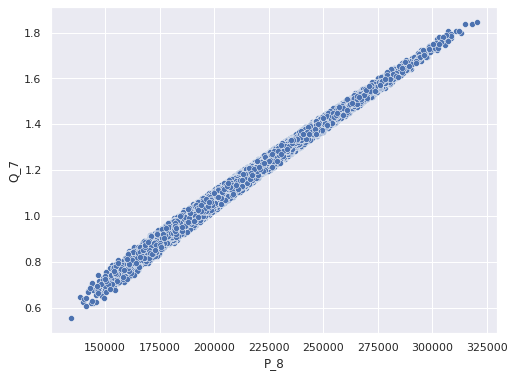

In [228]:
sns.scatterplot(x=df['P_8'], y=df['Q_7'])

<AxesSubplot:xlabel='P_1', ylabel='Q_1'>

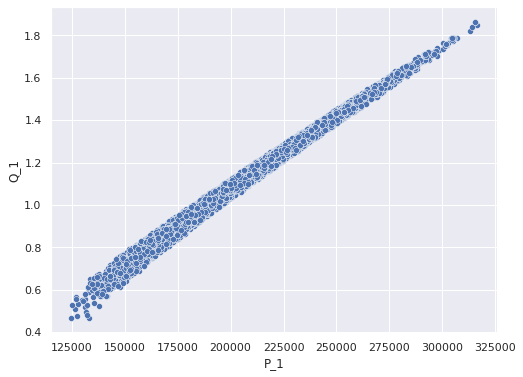

In [226]:
sns.scatterplot(x=df['P_1'], y=df['Q_1'])

<AxesSubplot:xlabel='P_4', ylabel='Q_4'>

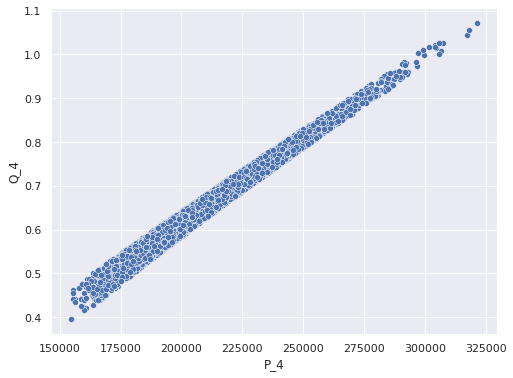

In [247]:
sns.scatterplot(x=df['P_4'], y=df['Q_4'])

<AxesSubplot:xlabel='P_6', ylabel='Q_5'>

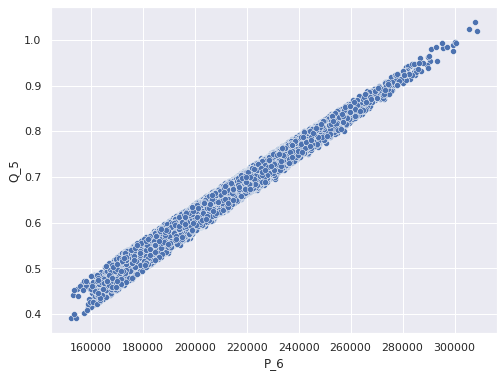

In [251]:
sns.scatterplot(x=df['P_6'], y=df['Q_5'])

## Gas direction


<AxesSubplot:xlabel='P_6', ylabel='P_7'>

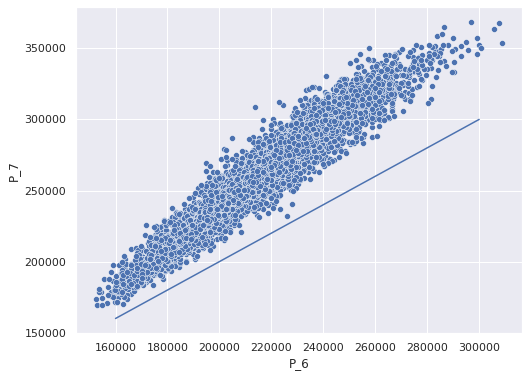

In [267]:
sns.scatterplot(x=df['P_6'], y=df['P_7'])#, hue=df['valve_1'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_8', ylabel='P_7'>

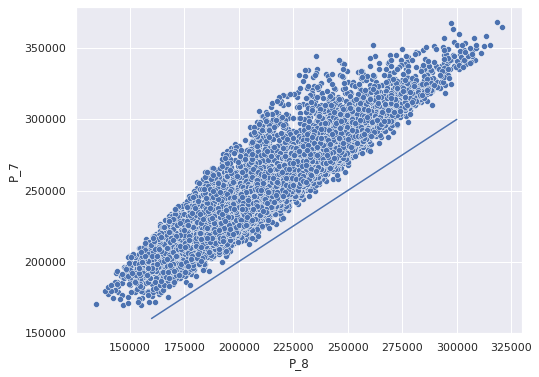

In [268]:
sns.scatterplot(x=df['P_8'], y=df['P_7'])#, hue=df['valve_1'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_8', ylabel='P_7'>

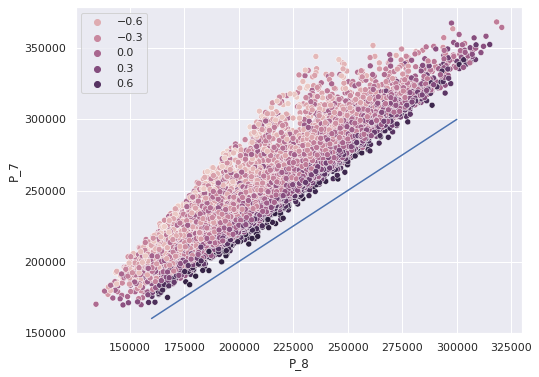

In [273]:
sns.scatterplot(x=df['P_8'], y=df['P_7'], hue=df['valve_3'] - df['valve_8'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='valve_3', ylabel='valve_8'>

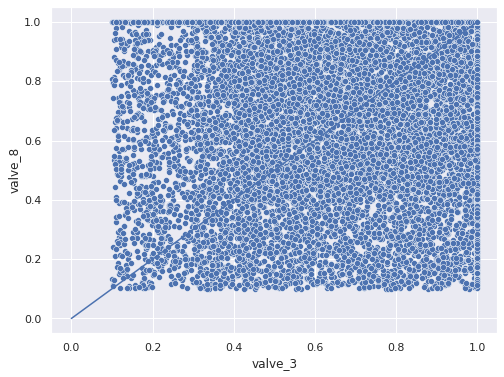

In [271]:
sns.scatterplot(x=df['valve_3'], y=df['valve_8'])#, hue=df['valve_1'])
sns.lineplot(x=np.linspace(0, 1, 10000), y=np.linspace(0, 1, 10000))

<AxesSubplot:xlabel='P_1', ylabel='P_2'>

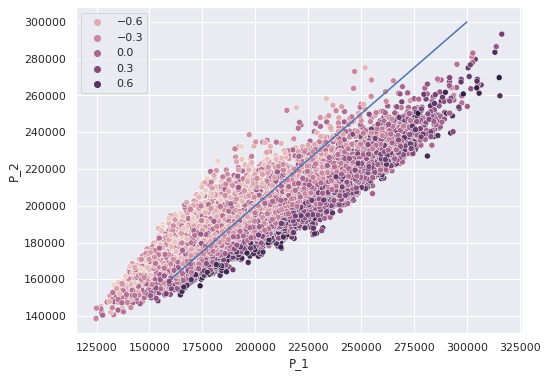

In [308]:
sns.scatterplot(x=df['P_1'], y=df['P_2'], hue=df['valve_5'] - df['valve_6'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_6', ylabel='P_3'>

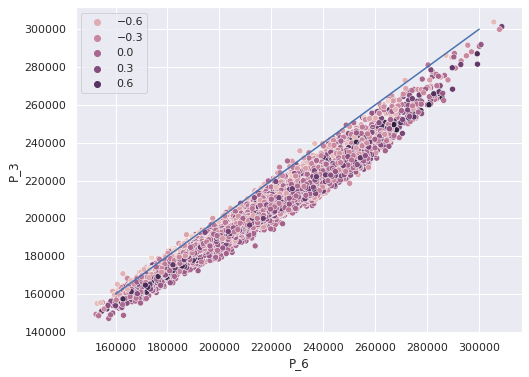

In [282]:
sns.scatterplot(x=df['P_6'], y=df['P_3'], hue=df['valve_5'] - df['valve_6'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_1', ylabel='P_3'>

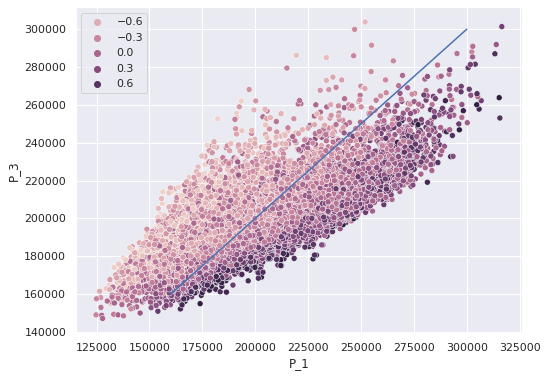

In [289]:
sns.scatterplot(x=df['P_1'], y=df['P_3'], hue=df['valve_5'] - df['valve_6'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='Q_1', ylabel='Q_3'>

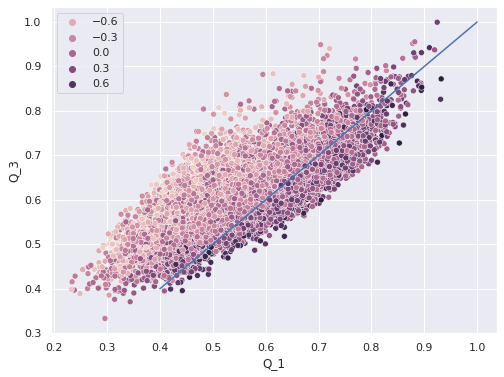

In [288]:
sns.scatterplot(x=df['Q_1'] / 2, y=df['Q_3'], hue=df['valve_5'] - df['valve_6'])
sns.lineplot(x=np.linspace(0.4, 1, 10000), y=np.linspace(0.4, 1, 10000))
# sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_3', ylabel='P_4'>

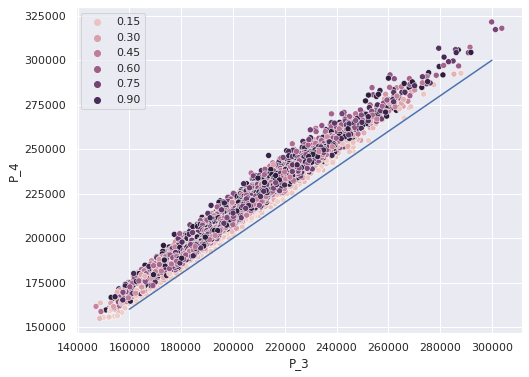

In [294]:
sns.scatterplot(x=df['P_3'], y=df['P_4'], hue=df['valve_7'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='Q_4', ylabel='Q_3'>

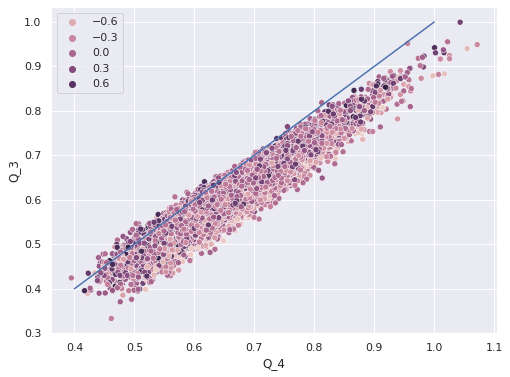

In [295]:
sns.scatterplot(x=df['Q_4'], y=df['Q_3'], hue=df['valve_5'] - df['valve_6'])
sns.lineplot(x=np.linspace(0.4, 1, 10000), y=np.linspace(0.4, 1, 10000))
# sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='P_5', ylabel='P_6'>

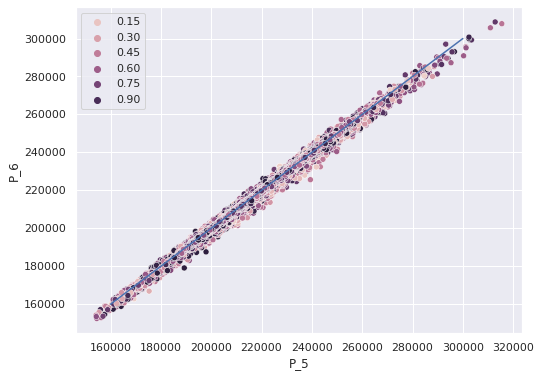

In [309]:
sns.scatterplot(x=df['P_5'], y=df['P_6'], hue=df['valve_3'])
sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

<AxesSubplot:xlabel='Q_1', ylabel='Q_2'>

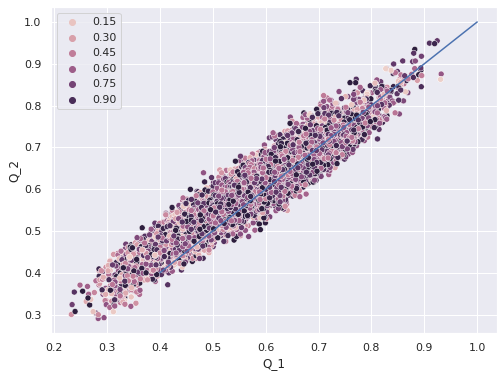

In [306]:
sns.scatterplot(x=df['Q_1'] / 2, y=df['Q_2'], hue=df['valve_3'])
sns.lineplot(x=np.linspace(0.4, 1, 10000), y=np.linspace(0.4, 1, 10000))
# sns.lineplot(x=np.linspace(160000, 300000, 10000), y=np.linspace(160000, 300000, 10000))

## Validate predictions

In [313]:
def get_q7_q1(pressure):
    return -0.3 + pressure * 7 / 1e6


def get_q4_q5(pressure):
    return -0.2 + pressure * 4 / 1e6


def validate_plant(preds):
    res = plant_q_rule(preds)
    
    return res


def check_validity(preds):
    validity_max = 12
    for i in range(1, 8):
        preds[f'validPrivate_{i}'] = validate_private(preds[[f'Q_{i}', f'P_{i}']]\
                                                      .rename(columns={f'Q_{i}': 'Q', f'P_{i}': 'P'}))
        # +7
    for i in range(1, 5):
        preds[f'validPlant_{i}'] = validate_plant(preds[f'QPlant_{i}'])
        # +5
        

    cols = [i for i in preds.columns if i.startswith('valid')]
    validity_score = preds[cols].sum(axis=1) / validity_max
    validity_binary = preds[cols].product(axis=1)
    
    return 

In [319]:
df.sample(20)[
    [f'Q_{i}' for i in range(1, 8)] +
    [f'QPlant_{i}' for i in range(1, 5)] +
    [f'P_{i}' for i in range(1, 10)] +
    ['QGRS_1', 'QGRS_2', 'PGRS_1', 'PGRS_2']
].to_csv('valid.csv')